# **TP on Adversarial Bandits**

#### imports

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt

## 1°)

the matrix I chose is in a way such that the colums are rock-paper-siccors in this order, and likewise for the rows.
the player's choices i.e (rock paper or scissors) is on the rows .




0=rock,1=Paper,2=scissors

if a player loose he gets a loss of 1, draw gets you a loss of 0 et if you win you get a loss of -1 for this L

this loss matrix is forthe player, for the adversary, one needs to multiply by -1 the elements

In [200]:

# i(rows) corresponds to the player and j (columns) corresponds to the aversary or machine
M=3 # len[rock,paper,scissors]
N=3 # same
L=np.array([[0,1,-1],[-1,0,1],[1,-1,0]])
L

array([[ 0,  1, -1],
       [-1,  0,  1],
       [ 1, -1,  0]])

## Part I Full information feedback


## 2°)a°) 
.

In [201]:

def rand_exp(p):
  x=[i for i in range(len(p))] # the choices range from 0 to M-1 (rather than 1 to M) because i wanted to use the same logic as python 
  return random.choices(x,p)[0] #I took the element in order to get rid of the [], because this caused issues later on
  

## 2°)b°)

In [225]:
def EWA_update(p,l,eta):
  lt_bis=np.exp([elt*eta*(-1) for elt in l])
  lp=np.multiply(p,lt_bis) #element wise product
  next_p=[elt/sum(lp) for elt in lp]
  return next_p



## 3°)a°)

The loss of the player if he chose i at time t is in the loss matrix L, ie L[i,j](or L[i][j]) if the adversary have chosen action j . 

In [226]:
def simul_ewa(T,eta):
    p=[1/3,1/3,1/3] #initialisation of p
    P=np.zeros((T,3)) #we'll use P the save the evolution of p
    Losses=[] # we'll use Losses to save the losses of the player at each time step
    cumul_regret=[]
    regret=0
    q=[1/2,1/4,1/4]
    for t in range(T):
        P[t]=p
        i=rand_exp(p)    #the player chooses an action via the p distribution
        j=rand_exp(q)
        Losses.append(L[i,j])
        regret += L[i,j]-L[1,j] #1 corresponds to the best strategy, ie playing hand always
        cumul_regret.append(regret)
        p=EWA_update(p,[L[0,j],L[1,j],L[2,j]],eta) #[L[0,j],L[1,j],L[2,j]] being the loss vector given the adversary having chosen j
    return P,Losses,cumul_regret

    

In [233]:
#simulation
a,b,c=simul_ewa(100,1)

In [234]:
a[3]

array([0.33333333, 0.33333333, 0.33333333])

## 3°)b°)evolution of the weight vectors


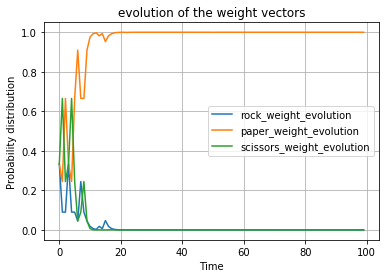

In [235]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(a)
ax.set(xlabel='Time', ylabel='Probability distribution', title='evolution of the weight vectors')
ax.grid()
plt.legend(('rock_weight_evolution','paper_weight_evolution', 'scissors_weight_evolution'))
plt.show()


the best strategy seems to be playing Paper . This is in accord with our intuition since we know the adversary play frequently rock, our best strategy would be to counter him wih paper


## 3°)c°)evolution of the average loss :


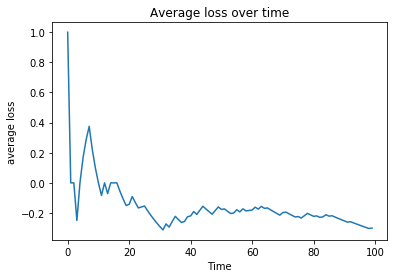

In [236]:
#the losses are contained in b in a,b,c=cumul_ewa(100,1)
Ls=[] #will contain the average loss over time
for t in range(1,101):
  av_loss=sum(b[0:t])/t 
  Ls.append(av_loss)
plt.plot(Ls)
plt.ylabel('average loss')
plt.xlabel('Time')
plt.title("Average loss over time")
plt.show()


we see that our loss converges toward -0.25 

## 3°)d°) evolution of the cumulative regret

Text(0.5, 0, 'Time')

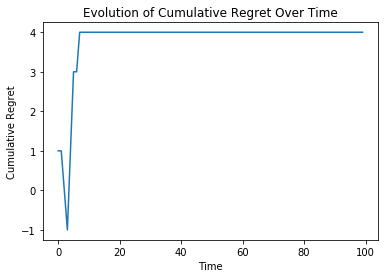

In [237]:
#cumulative regret in in C of a,b,c=cumul_ewa(100,1)
plt.plot(c)
plt.title('Evolution of Cumulative Regret Over Time')
plt.ylabel('Cumulative Regret')
plt.xlabel('Time')

regret become stable once we find the best strategy

## 3°)e°)

Text(0.5, 1.0, 'aveage loss over 10 simulation')

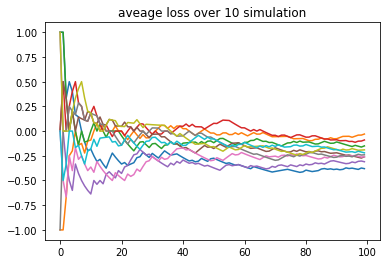

In [270]:
av_losses=[]#will contain the average losses of each of the 10 simulations
for h in range (10):
    a,b,c=simul_ewa(100,1)
    Ls=[]
    for t in range(1,101):
        av_loss=sum(b[0:t])/t 
        Ls.append(av_loss)
    av_losses.append(Ls)

fig = plt.figure()
ax = plt.subplot(111)
for i in range(10):
    l="simulation"+""+str(i)
    ax.plot(av_losses[i])
plt.title("aveage loss over 10 simulation")
    

let's plot the evolution of the max, min and average

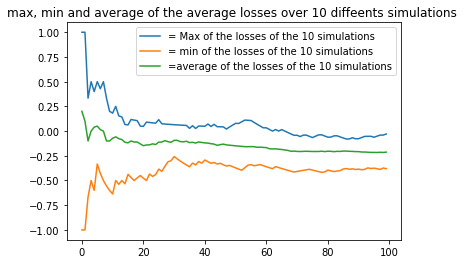

In [271]:
Max_L=[]
min_L=[]
average_L=[]
for i in range(100):
    data=[elt[i] for elt in av_losses ]
    Max_L.append(max(data))
    min_L.append(min(data))
    average_L.append(sum(data)/len(data))
T=[i for i in range(500)] 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Max_L,label='= Max of the losses of the 10 simulations')
ax.plot(min_L,label='= min of the losses of the 10 simulations')
ax.plot(average_L,label='=average of the losses of the 10 simulations')
ax.legend()
plt.title("max, min and average of the average losses over 10 diffeents simulations ")
plt.show()
    

at each timestep of the 10 simulations,i took the max , mean and average values of the losses to have the previous plot

we may need to plot for a longer amount of time but the losses seem to converge toward a certain value, which tells us that our algorithm is quite stable.  


## 3°)f°)


Text(0, 0.5, 'fial regret')

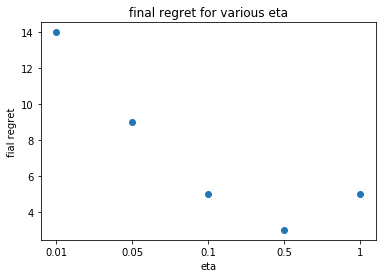

In [60]:
etats=[0.01, 0.05, 0.1, 0.5, 1]
regrets_etats=[]
for elt in etats:
    a,b,c=simul_ewa(100,elt)
    regrets_etats.append(c[-1])

plt.scatter(['0.01','0.05', '0.1', '0.5', '1'],regrets_etats)
plt.title("final regret for various eta")
plt.xlabel("eta")
plt.ylabel("final regret")

the best eta in practice seems to be 0.5.



However,In Theory $\sqrt{\frac{log K}{KT}}$ should be the best eta, i.e with K=3,T=100, the best one should be 0.06


4°)a°) simulation against an adaptatative adversary  

this time the adversay also uses the EWA algorithm

In [240]:
def adaptative_simul_ewa(T,eta_pl,eta_ad):
    p=[1/3,1/3,1/3] #initialisation of p
    q=[1/3,1/3,1/3] #initialazed via the same EWA algorithm
    P=np.zeros((T,3))
    Q=np.zeros((T,3))
    Losses=[] # we'll use Losses to save the losses of the player at each time step
    for t in range(T):
        P[t]=p
        Q[t]=q
        i=rand_exp(p)
        j=rand_exp(q)
        Losses.append(L[i,j])
        p=EWA_update(p,[L[0,j],L[1,j],L[2,j]],eta_pl) #[L[0,j],L[1,j],L[2,j]] being the loss vector given the adversary having chosen j
        q=EWA_update(q,[-L[i,0],-L[i,1],-L[i,2]],eta_ad) # the adversary also updates his weights 
    return P,Q,Losses

### simulation for eta player equals 1 and etat adversary equal 0.05

In [100]:
a,b,c = adaptative_simul_ewa(100,1,0.05)

### average loss of the playe over time

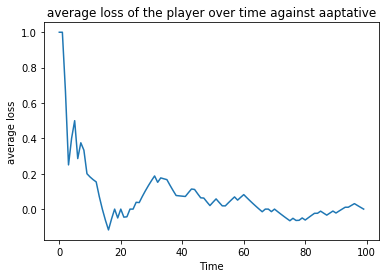

In [101]:
Ls=[]
for t in range(1,101):
  av_loss=sum(c[0:t])/t 
  Ls.append(av_loss)
plt.title(" average loss of the player over time against aaptative ")
plt.plot(Ls)
plt.ylabel('average loss')
plt.xlabel('Time')
plt.show()

the average loss no longer converges toward a negative values, but rather 0 cause both player adapts to each other 

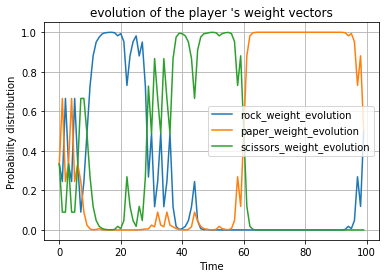

In [102]:
fig, ax = plt.subplots()
ax.plot(a)
ax.set(xlabel='Time', ylabel='Probability distribution', title="evolution of the player 's weight vectors")
ax.grid()
plt.legend(('rock_weight_evolution','paper_weight_evolution', 'scissors_weight_evolution'))
plt.show()

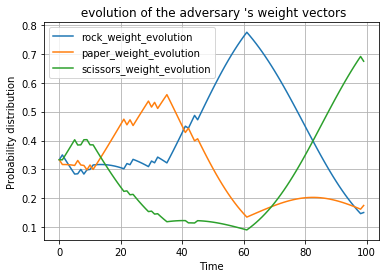

In [104]:
fig, ax = plt.subplots()
ax.plot(b) 
ax.set(xlabel='Time', ylabel='Probability distribution', title= " evolution of the adversary 's weight vectors")
ax.grid()
plt.legend(('rock_weight_evolution','paper_weight_evolution', 'scissors_weight_evolution'))
plt.show()

both players adapt to each other relatively differenty bcause of their different etas (learning rate)
we have cicles of winning stategies appearing du to this mutual adaptations

## 4°)b°)

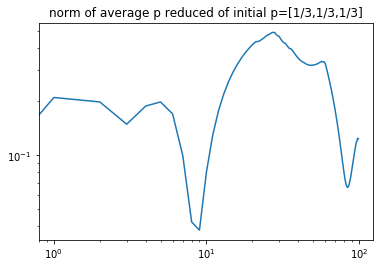

In [105]:
p_av_plot=[]
for t in range(1,101):
  p_barre_t=sum(a[0:t])/t 
  p_av_plot.append(np.linalg.norm(p_barre_t-np.array([1/3,1/3,1/3])))
plt.title("norm of average p reduced of initial p=[1/3,1/3,1/3]")
plt.loglog(p_av_plot)
plt.show()

we can see a conergnce toward 1/3 for each probability(each layer adapt to the other), hence it would e difficut to win to this game using this strategy

## Part II Bandit feedback

Here according to the LAB, we need to take a loss matrix with values between 0 and 1, hence we redefine a loss marix where the loss is 0 when we win, 0.5 when there's a draw, and 1 when we loose.

In [242]:
L2=np.array([[0.5,1,0],[0,0.5,1],[1,0,0.5]])
L2

array([[0.5, 1. , 0. ],
       [0. , 0.5, 1. ],
       [1. , 0. , 0.5]])

### 5°)a°)

In [243]:
def estimated_loss(i,l,p): #i is the action, l the loss, and p the probability vector at that time 
    estimated_loss=np.zeros(len(p)) 
    estimated_loss[i]=l/p[i] 
    return estimated_loss

## 5°)b°)

In [244]:
def EXP3_update(p,eta,loss_estimator): 
     #as his name suggest, loss_estimator will be of size (number of iteration,#M)
     # he will contains the estimators over time                                
    p_updated = np.zeros(len(p))
    aggregated_loss_est = [sum(loss_estimator[:,i]) for i in range(3)]
    for i in range(len(p)):
        p_updated[i] = np.exp(-eta*aggregated_loss_est[i])/sum(np.exp(-eta*aggregated_loss_est[j]) for j in range(3))
    return(p_updated)
    

## 6°) 
## repetition of 3°)a to 3°)f with exp3 instead of EWA


### SIMULATION of exp3 against  fixed strategy

In [245]:
#REMINDER 
L2=np.array([[0.5,1,0],[0,0.5,1],[1,0,0.5]])
L2

array([[0.5, 1. , 0. ],
       [0. , 0.5, 1. ],
       [1. , 0. , 0.5]])

In [246]:
def simul_exp3(T,eta):
    loss_estimator=np.zeros((T,3))
    p=[1/3,1/3,1/3] #initialisation of p
    P=np.zeros((T,3)) #we'll use P the save the evolution of p
    Losses=[] # we'll use Losses to save the losses of the player at each time step
    cumul_regret=[]
    regret=0
    q=[1/2,1/4,1/4]
    for t in range(T):
        P[t]=p
        i=rand_exp(p)
        j=rand_exp(q)
        Losses.append(L2[i,j])
        regret += L2[i,j]-L2[1,j] #1 corresponds to the best choice, paper
        cumul_regret.append(regret)
        loss_estimator[i]=estimated_loss(i,L2[i,j],p)
        p = EXP3_update(p,eta,loss_estimator) 
        
    return P,Losses,cumul_regret 

In [247]:
#actual simulation
a,b,c= simul_exp3(100,1)

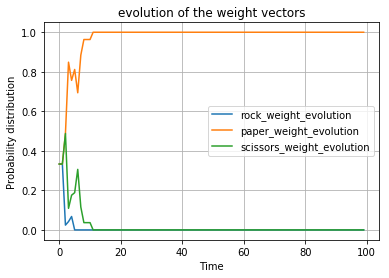

In [155]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(a)
ax.set(xlabel='Time', ylabel='Probability distribution', title='evolution of the weight vectors')
ax.grid()
plt.legend(('rock_weight_evolution','paper_weight_evolution', 'scissors_weight_evolution'))
plt.show()


as with the EWA, EXP3 manages to find the best strategy against a fixed adversary, that is to say **paper**. However, it sometimes converged toward the rock, a stategy in which he doesn't loose (without necessarily winning).
This goes towards what is said in the teachings.


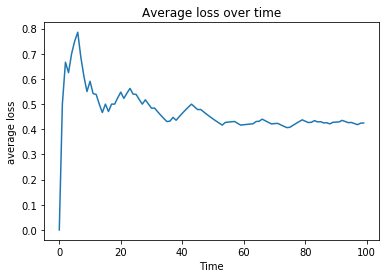

In [156]:
Ls=[] #will contain the average loss over time
for t in range(1,101):
  av_loss=sum(b[0:t])/t 
  Ls.append(av_loss)
plt.plot(Ls)
plt.ylabel('average loss')
plt.xlabel('Time')
plt.title("Average loss over time")
plt.show()


Text(0.5, 0, 'Time')

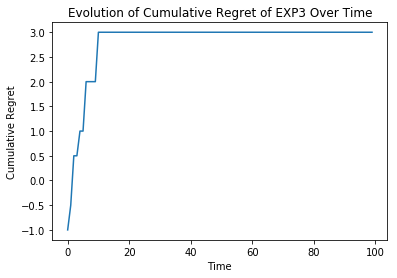

In [157]:
plt.plot(c)
plt.title('Evolution of Cumulative Regret of EXP3 Over Time')
plt.ylabel('Cumulative Regret')
plt.xlabel('Time')

Text(0.5, 1.0, 'aveage loss over 10 simulation')

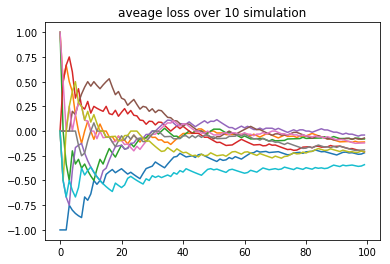

In [158]:
av_losses=[]#will contain the average losses of each of the 10 simulations
for h in range (10):
    a,b,c=simul_ewa(100,1)
    Ls=[]
    for t in range(1,101):
        av_loss=sum(b[0:t])/t 
        Ls.append(av_loss)
    av_losses.append(Ls)

fig = plt.figure()
ax = plt.subplot(111)
for i in range(10):
    l="simulation"+""+str(i)
    ax.plot(av_losses[i])
plt.title("aveage loss over 10 simulation")

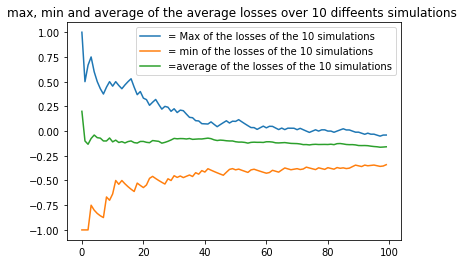

In [159]:
Max_L=[]
min_L=[]
average_L=[]
for i in range(100):
    data=[elt[i] for elt in av_losses ]
    Max_L.append(max(data))
    min_L.append(min(data))
    average_L.append(sum(data)/len(data))
T=[i for i in range(500)] 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Max_L,label='= Max of the losses of the 10 simulations')
ax.plot(min_L,label='= min of the losses of the 10 simulations')
ax.plot(average_L,label='=average of the losses of the 10 simulations')
ax.legend()
plt.title("max, min and average of the average losses over 10 diffeents simulations ")
plt.show()

Text(0, 0.5, 'fial regret')

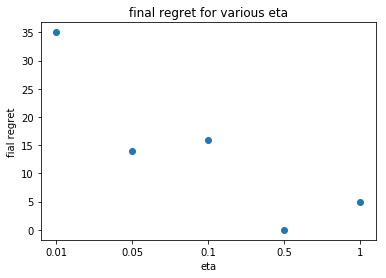

In [174]:
etats=[0.01, 0.05, 0.1, 0.5, 1]
regrets_etats=[]
for elt in etats:
    a,b,c=simul_ewa(100,elt)
    regrets_etats.append(c[-1])

plt.scatter(['0.01','0.05', '0.1', '0.5', '1'],regrets_etats)
plt.title("final regret for various eta")
plt.xlabel("eta")
plt.ylabel("fial regret")

this is way too unsable to give a practical best eta.
the best in theory should be  $\sqrt{\frac{log K}{KT}}$ should be the best eta,i.e 0.06

## 7°)
#### 4°)a°) and 4°)b°)

In [79]:
## simulation against an adaptative adversary :
## ie he also uses EXP3

In [177]:
def adaptative_simul_ewa(T,eta_pl,eta_ad):
    loss_estimator=np.zeros((T,3))
    loss_estimator_adv = np.zeros((T,3))
    p=[1/3,1/3,1/3] #initialisation of p
    P=np.zeros((T,3)) #we'll use P the save the evolution of p
    q=[1/3,1/3,1/3]
    Q=np.zeros((T,3))
    Losses=[] # we'll use Losses to save the losses of the player at each time step
    cumul_regret=[]
    regret=0
    for t in range(T):
        P[t]=p
        Q[t]=q
        i=rand_exp(p)
        j=rand_exp(q)
        Losses.append(L2[i,j])
        regret += L2[i,j]-L2[1,j] #1 corresponds to the best choice, ie minimize the loss
        cumul_regret.append(regret)
        loss_estimator[i]=estimated_loss(i,L2[i,j],p)
        loss_estimator_adv[i]=estimated_loss(j,L2[j,i],q)
        p = EXP3_update(p,eta_pl,loss_estimator) 
        q = EXP3_update(q,eta_ad,loss_estimator_adv) 
        
    return P,Q,Losses
    
    

In [193]:
#actual simulation
a,b,c=adaptative_simul_ewa(100,1,0.05)


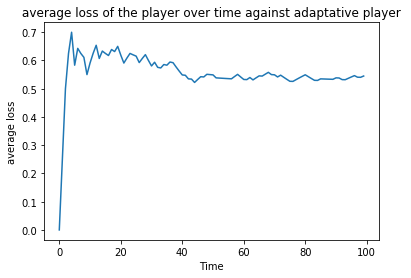

In [194]:
Ls=[]
for t in range(1,101):
  av_loss=sum(c[0:t])/t 
  Ls.append(av_loss)
plt.title(" average loss of the player over time against adaptative player ")
plt.plot(Ls)
plt.ylabel('average loss')
plt.xlabel('Time')
plt.show()

In [195]:
# blablabla

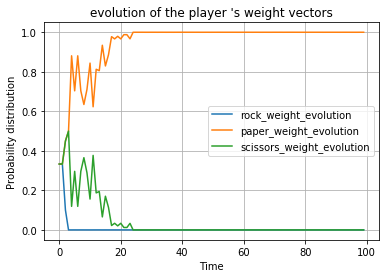

In [196]:
fig, ax = plt.subplots()
ax.plot(a)
ax.set(xlabel='Time', ylabel='Probability distribution', title="evolution of the player 's weight vectors")
ax.grid()
plt.legend(('rock_weight_evolution','paper_weight_evolution', 'scissors_weight_evolution'))
plt.show()

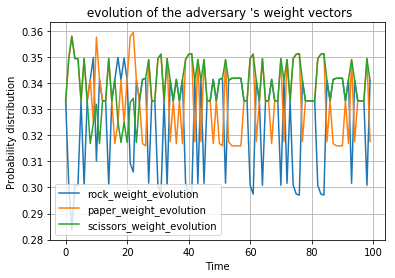

In [197]:
fig, ax = plt.subplots()
ax.plot(b) 
ax.set(xlabel='Time', ylabel='Probability distribution', title= " evolution of the adversary 's weight vectors")
ax.grid()
plt.legend(('rock_weight_evolution','paper_weight_evolution', 'scissors_weight_evolution'))
plt.show()

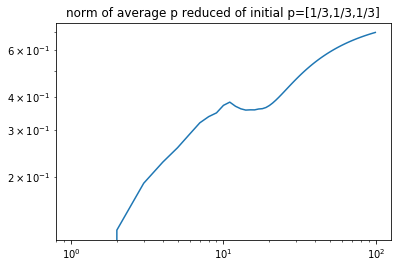

In [248]:
p_av_plot=[]
for t in range(1,101):
  p_barre_t=sum(a[0:t])/t 
  p_av_plot.append(np.linalg.norm(p_barre_t-np.array([1/3,1/3,1/3])))
plt.title("norm of average p reduced of initial p=[1/3,1/3,1/3]")
plt.loglog(p_av_plot)
plt.show()

compared to EWA, EXP3 is less stable 

## Part III Optional extentions

## 9°) EXP3.IX

let's adapt our estimated loss and update functions, in order to have take into acount gamma

In [251]:
def estimated_loss_IX(i,loss,p,gamma): 
    estimated_loss=np.zeros(len(p)) 
    estimated_loss[i]=(1+loss)/(p[i]) 
    return estimated_loss

def EXP3_IX_update(p,eta,loss_estimator): 
    #stays the same
    p_updated = np.zeros(len(p))
    aggregated_loss_est = [sum(loss_estimator[:,i]) for i in range(3)]
    for i in range(len(p)):
        p_updated[i] = np.exp(-eta*aggregated_loss_est[i])/sum(np.exp(-eta*aggregated_loss_est[j]) for j in range(3))
    return(p_updated)

In [252]:
def simul_exp3_IX(T,eta,gamma):
    loss_estimator=np.zeros((T,3))
    p=[1/3,1/3,1/3] #initialisation of p
    P=np.zeros((T,3)) #we'll use P the save the evolution of p
    Losses=[] # we'll use Losses to save the losses of the player at each time step
    cumul_regret=[]
    regret=0
    q=[1/2,1/4,1/4]
    for t in range(T):
        P[t]=p
        i=rand_exp(p)
        j=rand_exp(q)
        Losses.append(L2[i,j])
        regret += L2[i,j]-L2[1,j] #1 corresponds to the best choice, paper
        cumul_regret.append(regret)
        loss_estimator[i]=estimated_loss_IX(i,L2[i,j],p,gamma)
        p = EXP3_IX_update(p,eta,loss_estimator) 
        
    return P,Losses,cumul_regret 

In [274]:
a,b,c=simul_exp3_IX(100,1,0.05)

Text(0.5, 1.0, 'aveage loss over 10 simulation')

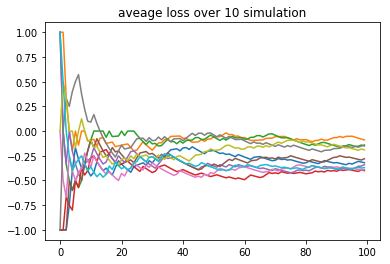

In [275]:
av_losses=[]#will contain the average losses of each of the 10 simulations
for h in range (10):
    a,b,c=simul_ewa(100,1)
    Ls=[]
    for t in range(1,101):
        av_loss=sum(b[0:t])/t 
        Ls.append(av_loss)
    av_losses.append(Ls)

fig = plt.figure()
ax = plt.subplot(111)
for i in range(10):
    l="simulation"+""+str(i)
    ax.plot(av_losses[i])
plt.title("aveage loss over 10 simulation")


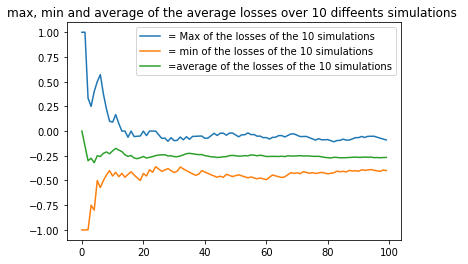

In [276]:
Max_L=[]
min_L=[]
average_L=[]
for i in range(100):
    data=[elt[i] for elt in av_losses ]
    Max_L.append(max(data))
    min_L.append(min(data))
    average_L.append(sum(data)/len(data))
T=[i for i in range(500)] 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Max_L,label='= Max of the losses of the 10 simulations')
ax.plot(min_L,label='= min of the losses of the 10 simulations')
ax.plot(average_L,label='=average of the losses of the 10 simulations')
ax.legend()
plt.title("max, min and average of the average losses over 10 diffeents simulations ")
plt.show()

the average losses seems to be less distanced than before (more concenrated on the end )